In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!ls -la /content/drive/MyDrive/Colab\ Notebooks/Project\ 3:\ Question\ Answering/Dynamic-Memory-Network-Plus/en

total 5770
-rw------- 1 root root  99632 May 16  2020 qa10_indefinite-knowledge_test.txt
-rw------- 1 root root  99217 May 16  2020 qa10_indefinite-knowledge_train.txt
-rw------- 1 root root 104800 May 16  2020 qa11_basic-coreference_test.txt
-rw------- 1 root root 104520 May 16  2020 qa11_basic-coreference_train.txt
-rw------- 1 root root 114489 May 16  2020 qa12_conjunction_test.txt
-rw------- 1 root root 114560 May 16  2020 qa12_conjunction_train.txt
-rw------- 1 root root 116444 May 16  2020 qa13_compound-coreference_test.txt
-rw------- 1 root root 116516 May 16  2020 qa13_compound-coreference_train.txt
-rw------- 1 root root 151420 May 16  2020 qa14_time-reasoning_test.txt
-rw------- 1 root root 152131 May 16  2020 qa14_time-reasoning_train.txt
-rw------- 1 root root  87769 May 16  2020 qa15_basic-deduction_test.txt
-rw------- 1 root root  87688 May 16  2020 qa15_basic-deduction_train.txt
-rw------- 1 root root 208208 May 16  2020 qa16_basic-induction_test.txt
-rw------- 1 root ro

In [4]:
from __future__ import division
import numpy as np

filename = '/content/drive/MyDrive/Colab Notebooks/Project 3: Question Answering/Dynamic-Memory-Network-Plus/glove.6B.100d.txt'

def loadEmbeddings(filename):
    vocab = []
    embd = []
    file = open(filename,'r')
    for line in file.readlines():
        row = line.strip().split(' ')
        vocab.append(row[0])
        embd.append(row[1:])
    print('Loaded!')
    file.close()
    return vocab,embd
vocab,embd = loadEmbeddings(filename)


word_vec_dim = len(embd[0])

vocab.append('<UNK>')
embd.append(np.asarray(embd[vocab.index('unk')],np.float32)+0.01)

vocab.append('<EOS>')
embd.append(np.asarray(embd[vocab.index('eos')],np.float32)+0.01)

vocab.append('<PAD>')
embd.append(np.zeros((word_vec_dim),np.float32))

embedding = np.asarray(embd)
embedding = embedding.astype(np.float32)



Loaded!


In [5]:
def word2vec(word):  # converts a given word into its vector representation
    if word in vocab:
        return embedding[vocab.index(word)]
    else:
        return embedding[vocab.index('<UNK>')]

def most_similar_eucli(x):
    xminusy = np.subtract(embedding,x)
    sq_xminusy = np.square(xminusy)
    sum_sq_xminusy = np.sum(sq_xminusy,1)
    eucli_dists = np.sqrt(sum_sq_xminusy)
    return np.argsort(eucli_dists)

word = 'frog'

most_similars = most_similar_eucli(word2vec(word))

print ("TOP TEN MOST SIMILAR WORDS TO '"+str(word)+"':\n")
for i in range(0,10):
    print (str(i+1)+". "+str(vocab[most_similars[i]]))

def vec2word(vec):   # converts a given vector representation into the represented word 
    most_similars = most_similar_eucli(np.asarray(vec,np.float32))
    return vocab[most_similars[0]]

TOP TEN MOST SIMILAR WORDS TO 'frog':

1. frog
2. toad
3. snake
4. ape
5. monkey
6. frogs
7. litoria
8. spider
9. hypsiboas
10. squirrel


In [6]:
v = list(map(word2vec,['what', 'color', 'is', 'brian']))
list(map(vec2word, v))

['what', 'color', 'is', 'brian']

In [7]:
# _filename = '/content/drive/MyDrive/Colab Notebooks/Project 3: Question Answering/Dynamic-Memory-Network-Plus/en/qa2_two-supporting-facts_train.txt' 

# _file = open(_filename,'r')
# count = 0
# lines = []
# for line in _file.readlines():
#     line = line.lower()
#     if count < 54:
#         lines.append(line)
#         print(line)
#         count +=1

# _file.close()

In [8]:
# import string
# cxts = []
# qus = []
# ans = []
# cxt = []
# num_questions = 0
# for line in lines:
#     segments = line.strip().split('\t')
#     if int(segments[0].strip().split(' ')[0]) != 1:
#         if '?' not in line:
#             sent = segments[0].translate(str.maketrans('', '', string.punctuation)).strip().split(' ')[1:]
#             cxt.append(sent)
#         else:
#             q = segments[0].translate(str.maketrans('', '', string.punctuation)).strip().split(' ')[1:]
#             a = segments[1].translate(str.maketrans('', '', string.punctuation)).strip().split(' ')
#             qus.append(q)
#             ans.append(a)
#             num_questions += 1
#     if int(segments[0].strip().split(' ')[0]) == 1 or line == lines[-1]:
#         if len(cxt) != 0:
#             for i in range(num_questions):
#                 cxts.append(cxt)
#         cxt = []
#         num_questions = 0

#         q = segments[0].translate(str.maketrans('', '', string.punctuation)).strip().split(' ')[1:]
#         a = segments[0].translate(str.maketrans('', '', string.punctuation)).strip().split(' ')
#         qus.append(q)
#         ans.append(a)
#         num_questions += 1

# '''
#  bộ thứ 3, input context có 130 sentences
#  còn lại là 70 sentences
#  (cấu hình ở paper DMN+)
# '''

In [9]:
# print(lines[0])
# _qa = lines[0].strip().split('\t')
# print(_qa, '\n')
# print(lines[30])
# _qa = lines[30].strip().split('\t')
# _qa

In [10]:
PAD = word2vec('<PAD>')
word_pad = PAD
UNK = word2vec('<UNK>')

In [11]:
# problem: append list l1 vào l3, sau đó thay đổi l1 thì l3[0] (tức l1 appended vào) cx thay đổi theo
# solution: tạo 1 copy của l1
l3 = []
l1 = [['1'], ['2'], ['3']]
l2 = [['a'], ['b'], ['c'], ['d'], ['e']]
_l1 = l1.copy()
l3.append(_l1)
l1.append(l2)
_l1 = l1.copy()
l3.append(_l1)
l3

[[['1'], ['2'], ['3']],
 [['1'], ['2'], ['3'], [['a'], ['b'], ['c'], ['d'], ['e']]]]

In [552]:
import string
# Data related to basic induction training and testing from QA bAbi tasks dataset will be used.
# (https://research.fb.com/downloads/babi/)

filename = '/content/drive/MyDrive/Colab Notebooks/Project 3: Question Answering/Dynamic-Memory-Network-Plus/en/qa5_three-arg-relations_train.txt' 

fact_story = [] 
question = []   
answer = []   
vec_fact_story = []

max_fact_len = 0
max_question_len = 0


def extract_info(filename,max_fact_len,max_question_len, vec_questions, vec_fact_stories, vec_answers):  
    
    fact_story = [] 
    vec_fact_story = []
    fact_stories = []
    ids = []
    questions = []
    answers = []
    file = open(filename,'r')
    lines = [line.lower() for line in file.readlines()]
    for line in  lines: 
        segments = line.strip().split('\t')
        if int(segments[0].strip().split(' ')[0]) != 1:
            if '?' in line:
                #q for question, a for answer.
                qa = line.strip().split('\t')
                q = qa[0]
                a = qa[1]
                idx = qa[-1].strip().split(' ')
                q = q.translate(str.maketrans('', '', string.punctuation)).strip().split(' ')
                if ',' in a:
                    a = a.replace(',', ' ')
                a = a.translate(str.maketrans('', '', string.punctuation)).strip().split(' ')
                q = q[1:]
                questions.append(q)
                answers.append(a)
                # khi xuất hiện câu hỏi sẽ thêm đoạn context trước đó vào làm 1 mẫu học
                _fact_story = fact_story.copy()
                fact_stories.append(_fact_story)
                _vec_fact_story = vec_fact_story.copy()
                vec_fact_stories.append(_vec_fact_story)
                ids.append(idx)

                # để đảm bảo id của câu trùng với index trong <list> fact_story
                fact_story.append(['<PAD>'])
                vec_fact_story.append([PAD])

                len_q = len(q) # tranh loi len(<map_object>) va gia tri len(list(q)) = 0 sau khi gan q = map(word2vec, q)
                q = map(word2vec,q)
                vec_questions.append(list(q))
                if len_q>max_question_len:
                    max_question_len = len_q

                a = map(vocab.index,a)
                vec_answers.append(list(a))
                
            else:
                fact = segments[0].translate(str.maketrans('', '', string.punctuation)).strip().split(' ')[1:]
                fact_story.append(fact)
                len_fact = len(fact)
                fact = map(word2vec,fact)
                vec_fact_story.append(list(fact))
                if len_fact>max_fact_len:
                    max_fact_len=len_fact

        if int(segments[0].strip().split(' ')[0]) == 1:                
            fact_story = []
            vec_fact_story = []
            fact_story.append(['<PAD>'])
            vec_fact_story.append([PAD])

            fact = segments[0].translate(str.maketrans('', '', string.punctuation)).strip().split(' ')[1:]
            fact_story.append(fact)
            len_fact = len(fact)
            fact = map(word2vec,fact)
            vec_fact_story.append(list(fact))
            if len_fact>max_fact_len:
                max_fact_len=len_fact
            
    file.close()
        
    return fact_stories,questions,answers, max_fact_len,max_question_len, vec_questions,vec_fact_stories,vec_answers, ids

# vec_questions = []
# vec_fact_stories = []
fact_stories,questions,answers, max_fact_len,max_question_len, vec_questions,vec_fact_stories,vec_answers, ids = extract_info(filename,max_fact_len,max_question_len,[], [], [])

filename = '/content/drive/MyDrive/Colab Notebooks/Project 3: Question Answering/Dynamic-Memory-Network-Plus/en/qa5_three-arg-relations_test.txt' 

test_fact_stories,test_questions,test_answers, max_test_fact_len,max_test_question_len, vec_test_questions,vec_test_fact_stories,vec_test_answers, test_ids = extract_info(filename,max_fact_len,max_question_len, [], [], [])


In [553]:
fact_stories[10]

[['<PAD>'],
 ['fred', 'travelled', 'to', 'the', 'garden'],
 ['jeff', 'took', 'the', 'milk', 'there'],
 ['bill', 'journeyed', 'to', 'the', 'kitchen'],
 ['jeff', 'passed', 'the', 'milk', 'to', 'bill']]

In [554]:
print(fact_stories[3])
print(questions[3])
print(int(ids[3][0]))
print(fact_stories[3][int(ids[3][0])])
print(answers[3])

[['<PAD>'], ['bill', 'travelled', 'to', 'the', 'office'], ['bill', 'picked', 'up', 'the', 'football', 'there'], ['bill', 'went', 'to', 'the', 'bedroom'], ['bill', 'gave', 'the', 'football', 'to', 'fred'], ['<PAD>'], ['fred', 'handed', 'the', 'football', 'to', 'bill'], ['jeff', 'went', 'back', 'to', 'the', 'office'], ['<PAD>'], ['bill', 'travelled', 'to', 'the', 'office'], ['bill', 'got', 'the', 'milk', 'there'], ['<PAD>'], ['fred', 'travelled', 'to', 'the', 'garden'], ['fred', 'went', 'to', 'the', 'hallway'], ['bill', 'journeyed', 'to', 'the', 'bedroom'], ['jeff', 'moved', 'to', 'the', 'hallway'], ['jeff', 'journeyed', 'to', 'the', 'bathroom'], ['bill', 'journeyed', 'to', 'the', 'office'], ['fred', 'travelled', 'to', 'the', 'bathroom'], ['mary', 'journeyed', 'to', 'the', 'kitchen'], ['jeff', 'took', 'the', 'apple', 'there'], ['jeff', 'gave', 'the', 'apple', 'to', 'fred']]
['who', 'did', 'jeff', 'give', 'the', 'apple', 'to']
21
['jeff', 'gave', 'the', 'apple', 'to', 'fred']
['fred']


In [555]:
# find out the maximum len of a sentence in fact stories
index = -1
max_fact_story_len = 0
for i in range(0,len(vec_fact_stories)):
    if len(vec_fact_stories[i]) > max_fact_story_len:
        max_fact_story_len = len(vec_fact_stories[i])
        index = i

print("Max sentences in fact story: ", max_fact_story_len)
print("index: ", index)
max_test_fact_story_len = 0
for i in range(0,len(vec_test_fact_stories)):
    if len(vec_test_fact_stories[i]) > max_test_fact_story_len:
        max_test_fact_story_len = len(vec_test_fact_stories[i])
        index = i

print("Max sentences in test fact story", max_test_fact_story_len)
print("index: ", index)

print(max_fact_len,max_question_len)
print(max_test_fact_len,max_test_question_len)

Max sentences in fact story:  107
index:  364
Max sentences in test fact story 99
index:  899
6 7
6 7


In [556]:
print("Training:\n")
fact_story_avg_len = 0
fact_story_len_dict = dict()
fact_story_avg_sentence_len = 0
fact_story_sentence_len_dict = dict()
fact_story_word_dict = dict()
for x in fact_stories:
    for sentence in x:
        fact_story_avg_sentence_len += len(sentence)
        if len(sentence) in fact_story_sentence_len_dict:
            fact_story_sentence_len_dict[len(sentence)] += 1
        else: 
            fact_story_sentence_len_dict[len(sentence)] = 1
        for word in sentence:
            if word in fact_story_word_dict:
                fact_story_word_dict[word] += 1
            else:
                fact_story_word_dict[word] = 1
    fact_story_avg_len += len(x)
    if len(x) not in fact_story_len_dict:
        fact_story_len_dict[len(x)] = 1
    else:
        fact_story_len_dict[len(x)] +=1
fact_story_avg_sentence_len /= fact_story_avg_len
fact_story_avg_len /= len(fact_stories)
fact_story_avg_sentence_len
print('Average sentences in a fact story: ', fact_story_avg_len)
print('Average sentences length in fact stories: ', fact_story_avg_sentence_len)
print('Fact length in fact stories: ')
fact_story_sentence_len_dict = sorted(fact_story_sentence_len_dict.items(), key=lambda kv: (kv[1], kv[0]), reverse=True)
for k, v in fact_story_sentence_len_dict:
    print(k, v)
print('Story length and its counted number in training data: ')
fact_story_len_dict = sorted(fact_story_len_dict.items(), key=lambda kv: (kv[0], kv[1]), reverse=True)
for k, v in fact_story_len_dict:
    print(k, v)

# fact_story_len_list = [x[0] for x in fact_story_len_dict]
# fact_story_len_quantity_list = [x[1] for x in fact_story_len_dict]
# plt.bar(fact_story_len_list, fact_story_len_quantity_list)
# plt.title('QA1: Single supporting fact - train')
# plt.ylabel("quantity")
# plt.xlabel("Context length")
# plt.show()

# print('Words appear in fact stories:')
# fact_story_word_dict = sorted(fact_story_word_dict.items(), key=lambda kv: (kv[0], kv[1]), reverse=True)
# for k, v in fact_story_word_dict:
#     print(k, v)


print('\n')
question_avg_len = 0
for x in questions:
    question_avg_len += len(x)
    
question_avg_len /= len(questions)
print('Average length of a question: ', question_avg_len)

max_answer_len = 0
for answer in vec_answers:
    if len(answer) > max_answer_len:
        max_answer_len = len(answer)
for answer in vec_test_answers:
    if len(answer) > max_answer_len:
        max_answer_len = len(answer)

print('Max answer length in both train and test set: ', max_answer_len)

Training:

Average sentences in a fact story:  21.996
Average sentences length in fact stories:  4.662620476450264
Fact length in fact stories: 
5 11961
6 5807
1 3000
4 1228
Story length and its counted number in training data: 
107 1
104 1
101 1
98 1
95 1
89 1
86 1
83 2
70 1
69 1
67 2
66 1
65 3
64 1
63 1
62 2
60 1
59 5
57 1
56 4
53 2
51 4
50 1
49 3
48 3
47 5
46 3
45 5
44 4
43 6
42 3
41 8
40 5
39 12
38 10
37 15
36 10
35 13
34 15
33 16
32 8
31 22
30 12
29 27
28 16
27 22
26 23
25 33
24 15
23 37
22 24
21 33
20 35
19 40
18 28
17 54
16 31
15 38
14 40
13 35
12 36
11 46
10 26
9 40
8 26
7 26
6 13
5 26
3 13


Average length of a question:  5.495
Max answer length in both train and test set:  1


In [557]:
print("Test:\n")
test_fact_story_avg_len = 0
test_fact_story_len_dict = dict()
test_fact_story_avg_sentence_len = 0
test_fact_story_sentence_len_dict = dict()
test_fact_story_word_dict = dict()
for x in test_fact_stories:
    for sentence in x:
        test_fact_story_avg_sentence_len += len(sentence)
        if len(sentence) in test_fact_story_sentence_len_dict:
            test_fact_story_sentence_len_dict[len(sentence)] += 1
        else: 
            test_fact_story_sentence_len_dict[len(sentence)] = 1
        for word in sentence:
            if word in test_fact_story_word_dict:
                test_fact_story_word_dict[word] += 1
            else:
                test_fact_story_word_dict[word] = 1
    test_fact_story_avg_len += len(x)
    if len(x) not in test_fact_story_len_dict:
        test_fact_story_len_dict[len(x)] = 1
    else:
        test_fact_story_len_dict[len(x)] +=1
test_fact_story_avg_sentence_len /= test_fact_story_avg_len
test_fact_story_avg_len /= len(test_fact_stories)
test_fact_story_avg_sentence_len
print('Average sentences in a test fact story: ', test_fact_story_avg_len)
print('Average sentences length in test fact stories: ', test_fact_story_avg_sentence_len)
print('Fact length in test fact stories: ')
test_fact_story_sentence_len_dict = sorted(test_fact_story_sentence_len_dict.items(), key=lambda kv: (kv[1], kv[0]), reverse=True)
for k, v in test_fact_story_sentence_len_dict:
    print(k, v)
print('Story length and its counted number in TEST data: ')
test_fact_story_len_dict = sorted(test_fact_story_len_dict.items(), key=lambda kv: (kv[0], kv[1]), reverse=True)
for k, v in test_fact_story_len_dict:
    print(k, v)

# test_fact_story_len_list = [x[0] for x in test_fact_story_len_dict]
# test_fact_story_len_quantity_list = [x[1] for x in test_fact_story_len_dict]
# plt.bar(test_fact_story_len_list, test_fact_story_len_quantity_list)
# plt.title('QA1: Single supporting fact - test')
# plt.ylabel("quantity")
# plt.xlabel("Context length")
# plt.show()

# print('Words appear in test fact stories:')
# test_fact_story_word_dict = sorted(test_fact_story_word_dict.items(), key=lambda kv: (kv[0], kv[1]), reverse=True)
# for k, v in test_fact_story_word_dict:
#     print(k, v)


print('\n')
test_question_avg_len = 0
for x in test_questions:
    test_question_avg_len += len(x)
    
test_question_avg_len /= len(test_questions)
print('Average length of a question: ', test_question_avg_len)

max_answer_len = 0
for answer in vec_answers:
    if len(answer) > max_answer_len:
        max_answer_len = len(answer)
for answer in vec_test_answers:
    if len(answer) > max_answer_len:
        max_answer_len = len(answer)

print('Max answer length in both train and test set: ', max_answer_len)

Test:

Average sentences in a test fact story:  22.894
Average sentences length in test fact stories:  4.684851926268891
Fact length in test fact stories: 
5 12549
6 6065
1 3000
4 1280
Story length and its counted number in TEST data: 
99 1
96 1
79 1
76 1
73 3
71 1
70 2
69 1
68 1
67 3
66 1
65 3
64 1
63 2
62 2
61 2
60 2
59 2
58 1
57 5
56 1
55 4
54 3
53 2
52 5
51 4
50 1
49 5
48 2
47 2
46 4
45 7
44 1
43 12
42 5
41 7
40 9
39 12
38 7
37 15
36 9
35 18
34 10
33 18
32 11
31 14
30 15
29 27
28 14
27 24
26 24
25 29
24 19
23 41
22 26
21 38
20 32
19 40
18 33
17 43
16 27
15 45
14 37
13 31
12 33
11 42
10 23
9 36
8 19
7 23
6 18
5 19
3 18


Average length of a question:  5.509
Max answer length in both train and test set:  1


Context length MAX:  107
Test_Context length MAX:  99


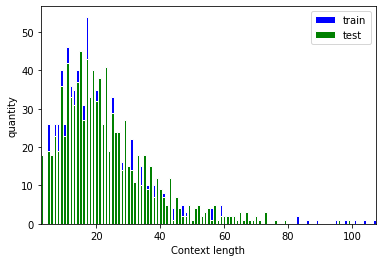

In [558]:
import matplotlib.pyplot as plt

fact_story_len_list = [x[0] for x in fact_story_len_dict]
fact_story_len_quantity_list = [x[1] for x in fact_story_len_dict]
test_fact_story_len_list = [x[0] for x in test_fact_story_len_dict]
test_fact_story_len_quantity_list = [x[1] for x in test_fact_story_len_dict]

print("Context length MAX: ", fact_story_len_list[0])
print("Test_Context length MAX: ", test_fact_story_len_list[0])

length = list(set(fact_story_len_list) | set(test_fact_story_len_list))

index = np.arange(len(length))
for i in range(len(length)):
    if length[i] not in test_fact_story_len_list:
        test_fact_story_len_list.append(length[i])
        test_fact_story_len_quantity_list.append(0)

for i in range(len(length)):
    if length[i] not in fact_story_len_list:
        fact_story_len_list.append(length[i])
        fact_story_len_quantity_list.append(0)

width = 0.1
plt.bar(fact_story_len_list, fact_story_len_quantity_list, color='blue', label='train', edgecolor='white')
plt.bar(test_fact_story_len_list, test_fact_story_len_quantity_list, color='green', label='test', edgecolor='white')
# plt.title('QA1: Single supporting fact')
plt.ylabel("quantity")
plt.xlabel("Context length")
plt.legend(loc='best')
# plt.tick_params(axis='x', which='major', labelsize=1)
plt.autoscale(enable=True, axis='x', tight=True)
# plt.xlim(0, max(fact_story_avg_len*2, 2*test_fact_story_avg_len))
plt.show()


[]

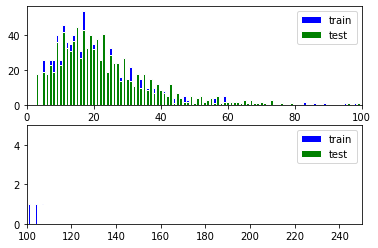

In [559]:
ax= plt.subplot(2,1,1)
ax.bar(fact_story_len_list, fact_story_len_quantity_list, color='blue', label='train', edgecolor='white')
ax.bar(test_fact_story_len_list, test_fact_story_len_quantity_list, color='green', label='test', edgecolor='white')
# plt.title('QA3: Three supporting facts')
# ax.ylabel("quantity")
# ax.xlabel("Context length")
ax.legend(loc='best')
ax.set_xlim(0, 100)
ax.plot()

ax= plt.subplot(2,1,2)
ax.bar(fact_story_len_list, fact_story_len_quantity_list, color='blue', label='train', edgecolor='white')
ax.bar(test_fact_story_len_list, test_fact_story_len_quantity_list, color='green', label='test', edgecolor='white')
# plt.title('QA3: Three supporting facts')
# ax.ylabel("quantity")
# ax.xlabel("Context length")
ax.legend(loc='best')
ax.set_xlim(100, 250)
ax.set_ylim(0, 5)
ax.plot()

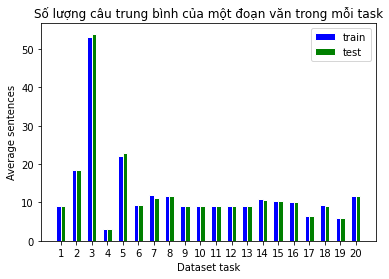

In [588]:
avg_num_sentences = [9.0, 18.420, 53.024, 3.0, 21.996, 9.300, 11.902, 11.772, 9.0, 9.0, 9.0, 9.0, 9.0, 10.86, 10.5, 10.0, 6.5, 9.293, 6.0, 11.686]
test_avg_num_sentences = [9.0, 18.426, 53.968, 3.0, 22.894, 9.232, 11.138, 11.8, 9.0, 9.0, 9.0, 9.0, 9.0, 10.76, 10.5, 10.0, 6.5, 9.137, 6.0, 11.798]

index = np.arange(1, len(avg_num_sentences)+1)
tasks = list(index)
width = 0.3
plt.bar(index,avg_num_sentences,width, color='blue', label='train', edgecolor='white')
plt.bar(index+width,test_avg_num_sentences,width,color='green', label='test', edgecolor='white')
plt.title('Số lượng câu trung bình của một đoạn văn trong mỗi task')
plt.ylabel('Average sentences')
plt.xlabel('Dataset task')
plt.legend(loc='best')
plt.xticks(index + width/2, tasks)
plt.show()

In [561]:
# vec_fact_stories = vec_fact_stories + vec_test_fact_stories[:300]
# vec_questions = vec_questions + vec_test_questions[:300]
# vec_answers = vec_answers + vec_test_answers[:300]

# del vec_test_fact_stories[:300]
# del vec_test_questions[:300]
# del vec_test_answers[:300]

# print(len(vec_fact_stories), len(vec_questions), len(vec_answers))
# print(len(vec_test_fact_stories), len(vec_test_questions), len(vec_test_answers))

### PADDING



> Padding answer



In [562]:
for i in range(len(vocab)):
    v = vocab[i]
    if v == '<PAD>':
        print(i)

400002


In [563]:
for i in range(0, len(vec_answers)):
    answer_len = len(vec_answers[i])
    for _ in range(answer_len, max_answer_len):
        vec_answers[i].append(400002)

for i in range(0, len(vec_test_answers)):
    answer_len = len(vec_test_answers[i])
    for _ in range(answer_len, max_answer_len):
        vec_test_answers[i].append(400002)



> PADDING MORE WORDS TO SENTECES



In [564]:
# PADDING MORE WORDS TO SENTECES
for i in range(0,len(vec_questions)):
    questions_len = len(vec_questions[i])
    for j in range(questions_len,max_question_len):
        vec_questions[i].append(PAD)
    for j in range(0,len(vec_fact_stories[i])):
        fact_len = len(vec_fact_stories[i][j])
        for k in range(fact_len,max_fact_len):
            vec_fact_stories[i][j].append(PAD)

for i in range(0,len(vec_test_questions)):
    questions_len = len(vec_test_questions[i])
    for j in range(questions_len,max_question_len):
        vec_test_questions[i].append(PAD)
    for j in range(0,len(vec_test_fact_stories[i])):
        fact_len = len(vec_test_fact_stories[i][j])
        for k in range(fact_len,max_fact_len):
            vec_test_fact_stories[i][j].append(PAD)

### PADDING MORE SENTENCES TO CONTEXT
'''
sentence_pad = [np.zeros((100,))]*max_fact_len
for i in range(0,len(vec_fact_stories)):
    if (len(vec_fact_stories[i]) < max_fact_story_len):
        for j in range(len(vec_fact_stories[i]), max_fact_story_len):
            vec_fact_stories[i].append(sentence_pad)

for i in range(0,len(vec_test_fact_stories)):
    if (len(vec_test_fact_stories[i]) < max_test_fact_story_len):
        for j in range(len(vec_test_fact_stories[i]), max_test_fact_story_len):
            vec_test_fact_stories[i].append(sentence_pad)
'''
# Padding random sentences in context in order to ensure in a context has 70 sentences (except the third dataset has 130 sentences)

'\nsentence_pad = [np.zeros((100,))]*max_fact_len\nfor i in range(0,len(vec_fact_stories)):\n    if (len(vec_fact_stories[i]) < max_fact_story_len):\n        for j in range(len(vec_fact_stories[i]), max_fact_story_len):\n            vec_fact_stories[i].append(sentence_pad)\n\nfor i in range(0,len(vec_test_fact_stories)):\n    if (len(vec_test_fact_stories[i]) < max_test_fact_story_len):\n        for j in range(len(vec_test_fact_stories[i]), max_test_fact_story_len):\n            vec_test_fact_stories[i].append(sentence_pad)\n'

In [565]:
import secrets
import random

context_len = int(fact_story_avg_len)
context_len = int(context_len/2)
rm_indices = [] # xóa mẫu học (dựa vào index) có số câu trong context lớn hơn context_len (sau khi đã sử dụng cửa sổ trượt để quy số lượng câu văn về context_len)

# modify training set
for i in range(0, len(vec_fact_stories)):
    fact = vec_fact_stories[i]
    # f_index = list(range(1, len(fact)))
    if len(fact) < context_len:
        for _ in range(len(fact), context_len): # if padding support sentences (sentence id is ids[i]), context_len do subtraction to len(ids[i])
            # pad = fact[secrets.choice(f_index)]
            pad = []
            for _ in range(max_fact_len):
                pad.append(secrets.choice([PAD]))
            vec_fact_stories[i].append(pad)
        # for id in ids[i][::-1]:
        #     vec_fact_stories[i].append(vec_fact_stories[i][int(id)])
    if len(fact) > context_len:
        for j in range(0, len(vec_fact_stories[i])-context_len-len(ids[i])):
            pad_fact_story = vec_fact_stories[i][j:j+context_len-len(ids[i])]
            for id in ids[i][::-1]:
                pad_fact_story.append(vec_fact_stories[i][int(id)])
            pad_question = vec_questions[i]
            pad_answer = vec_answers[i]
            # Padding
            vec_fact_stories.append(pad_fact_story)
            vec_questions.append(pad_question)
            vec_answers.append(pad_answer)
        rm_indices.insert(0,i)

# remove record in remove_list
for i in rm_indices:
    del (vec_fact_stories[i])
    del (vec_questions[i])
    del (vec_answers[i])


rm_indices = []
# modify test set
for i in range(0, len(vec_test_fact_stories)):
    fact = vec_test_fact_stories[i]
    # f_index = list(range(1, len(fact)))
    if len(fact) < context_len:
        for _ in range(len(fact), context_len):  # if padding support sentences (sentence id is ids[i]), context_len do subtraction to len(test_ids[i])
            # pad = fact[secrets.choice(f_index)]
            pad = []
            for _ in range(max_test_fact_len):
                pad.append(secrets.choice([PAD]))
            vec_test_fact_stories[i].append(pad)
        # for id in test_ids[i][::-1]:
        #     vec_test_fact_stories[i].append(vec_test_fact_stories[i][int(id)])
    if len(fact) > context_len:
        for j in range(0, len(vec_test_fact_stories[i])-context_len-len(test_ids[i])):
            pad_fact_story = vec_test_fact_stories[i][j:j+context_len-len(test_ids[i])]
            for id in test_ids[i][::-1]:
                pad_fact_story.append(vec_test_fact_stories[i][int(id)])
            pad_question = vec_test_questions[i]
            pad_answer = vec_test_answers[i]
            # Padding
            vec_test_fact_stories.append(pad_fact_story)
            vec_test_questions.append(pad_question)
            vec_test_answers.append(pad_answer)
        rm_indices.insert(0,i)

# remove record in remove_list
for i in rm_indices:
    del (vec_test_fact_stories[i])
    del (vec_test_questions[i])
    del (vec_test_answers[i])

In [566]:
sample = 3
print(sample)
print("FACTS:\n")
ex = vec_fact_stories[sample]
ex_q = vec_questions[sample]
ex_a = vec_answers[sample]
for i in range(len(ex)):
    print(str(i+1)+") ",)
    print(list(map(vec2word,ex[i])))
    
print("\nQUESTION:")
print(list(map(vec2word,ex_q)))
print("\nANSWER:")
print(vocab[int(ex_a[0])])

3
FACTS:

1) 
['<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>']
2) 
['fred', 'travelled', 'to', 'the', 'garden', '<PAD>']
3) 
['jeff', 'took', 'the', 'milk', 'there', '<PAD>']
4) 
['bill', 'journeyed', 'to', 'the', 'kitchen', '<PAD>']
5) 
['jeff', 'passed', 'the', 'milk', 'to', 'bill']
6) 
['<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>']
7) 
['bill', 'gave', 'the', 'milk', 'to', 'jeff']
8) 
['jeff', 'passed', 'the', 'milk', 'to', 'bill']
9) 
['<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>']
10) 
['<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>']

QUESTION:
['who', 'gave', 'the', 'milk', '<PAD>', '<PAD>', '<PAD>']

ANSWER:
jeff


In [567]:
print(len(vec_fact_stories[0]))
print(type(vec_fact_stories[0]))

print(len(vec_fact_stories[0][1]))
print(type(vec_fact_stories[0][1]))

print(len(vec_fact_stories[0][0][1]))
print(type(vec_fact_stories[0][0][1]))

print((vec_fact_stories[0][0][1]).shape)

10
<class 'list'>
6
<class 'list'>
100
<class 'numpy.ndarray'>
(100,)


In [568]:
print(len(vec_fact_stories[1]))
print(type(vec_fact_stories[1]))

print(len(vec_fact_stories[1][0]))
print(type(vec_fact_stories[1][0]))

print(len(vec_fact_stories[1][0][1]))
print(type(vec_fact_stories[1][0][1]))

print((vec_fact_stories[1][0][1]).shape)

10
<class 'list'>
6
<class 'list'>
100
<class 'numpy.ndarray'>
(100,)


In [569]:
# vec_fact_stories = np.asarray(vec_fact_stories,np.float32)
# print(vec_fact_stories.shape)
# vec_questions = np.asarray(vec_questions,np.float32)
# print(vec_questions.shape)
# vec_answers = np.asarray(vec_answers,np.float32)
# print(vec_answers.shape)
# vec_test_fact_stories = np.asarray(vec_test_fact_stories,np.float32)
# print(vec_test_fact_stories.shape)
# vec_test_questions = np.asarray(vec_test_questions,np.float32)
# print(vec_test_questions.shape)
# vec_test_answers = np.asarray(vec_test_answers,np.float32)
# print(vec_test_answers.shape)

In [570]:
# #Saving processed data in another file.

# import pickle

# PICK = [vec_fact_stories,vec_questions,vec_answers,vec_test_fact_stories,vec_test_questions,vec_test_answers]

# with open('/content/drive/MyDrive/Colab Notebooks/Project 3: Question Answering/Dynamic-Memory-Network-Plus/embeddingPICKLE-3', 'wb') as fp:
#     pickle.dump(PICK, fp)